# Serum oncRNA Analysis
Here we will analyze serum data from multiple cancer types, also compare ratio restricted versus non-ratio restricted version of oncRNA calls.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json as js
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Create Data Matrix

In [2]:
with open(f'data/counts/sample_loci.json', 'r') as f:
    sample_loci = js.load(f)
    f.close()

Remove T3 from ISPY for downstream analysis

In [3]:
ISPY_meta = pd.read_excel("metadata/ISPY_all_clinical_data_combined.xlsx")
to_drop = ISPY_meta[(ISPY_meta["PrePost(0:Pre,3:Post)"] == 3) | (ISPY_meta["Admin.PCR"].isna())]["Working ID"]
to_drop.shape

(82,)

In [4]:
len(sample_loci)

227

In [5]:
for k in to_drop:
    k = f"ISPY_{k}"
    if k in sample_loci: #S90 and all the healthy from ISPY is already missing.
        sample_loci.pop(k)
len(sample_loci)

151

In [6]:
merged_df = pd.DataFrame(sample_loci).fillna(0)
merged_df

,ISPY_S79,ISPY_S89,ISPY_S55,ISPY_S147,ISPY_S43,ISPY_S151,ISPY_S129,ISPY_S105,ISPY_S17,ISPY_S113,...,PRAD_12557-50-T4,PRAD_12557-34-T4,PRAD_12557-44-T1,PNC-1029-V1,PNC-0390-V2,PNC-0369-V1,PNC-0367-V,PNC-0390-D0,PNC-0368-V1,PNC-0410-D1
chr1:2367661-2367702:-,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
chr1:5744824-5744944:-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:8010853-8010883:-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:14611646-14611667:+,1.0,4.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:18568603-18568626:+,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:153139560-153139581:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
chrY:15083837-15083880:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
chrY:18877697-18877731:+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
chrY:19188540-19188561:+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Filter Cancer Types

In [7]:
prad = merged_df.loc[:, merged_df.columns.str.contains("PRAD")]
prad = prad.loc[:, prad.sum(axis=0)>10000]
prad = prad.loc[prad.sum(axis=1)>0,:]
prad.shape

(150942, 10)

In [8]:
brca = merged_df.loc[:, merged_df.columns.str.contains("ISPY")]
brca = brca.loc[:,brca.sum(axis=0)>500]
brca = brca.loc[brca.sum(axis=1)>0,:]
brca.shape

(26489, 44)

In [9]:
pdac = merged_df.loc[:, merged_df.columns.str.contains("PNC")]
pdac = pdac.loc[:,pdac.sum(axis=0)>2000]
pdac = pdac.loc[pdac.sum(axis=1)>0,:]
pdac.shape

(71944, 5)

In [10]:
merged_df = pd.concat([brca.sample(frac=1), prad.sample(frac=1), pdac.sample(frac=1), ], axis=1).fillna(0)
merged_df.shape

(172131, 59)

172131 oncRNAs vs 172318 oncRNAs. Not that big of a difference.

In [11]:
merged_bin_df = merged_df
merged_bin_df[merged_bin_df>0] = 1
merged_bin_df = merged_bin_df.loc[merged_bin_df.sum(axis=1)>2,]
merged_bin_df.shape

(72232, 59)

In [13]:
BRCA_columns = np.array([True if x.startswith("ISPY") else False for x in merged_bin_df.columns])
PRAD_columns = np.array([True if x.startswith("PRAD") else False for x in merged_bin_df.columns])
PAAD_columns = np.array([True if x.startswith("PNC") else False for x in merged_bin_df.columns])
BRCA_rows = merged_bin_df.loc[(merged_bin_df.loc[:,BRCA_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~BRCA_columns].sum(axis=1)==0),].index
PRAD_rows = merged_bin_df.loc[(merged_bin_df.loc[:,PRAD_columns].sum(axis=1)>4) & (merged_bin_df.iloc[:,~PRAD_columns].sum(axis=1)==0),].index
PAAD_rows = merged_bin_df.loc[(merged_bin_df.loc[:,PAAD_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~PAAD_columns].sum(axis=1)==0),].index

merged_bin_df = merged_bin_df.loc[((merged_bin_df.loc[:,BRCA_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~BRCA_columns].sum(axis=1)==0)) | \
                        ((merged_bin_df.loc[:,PRAD_columns].sum(axis=1)>4) & (merged_bin_df.iloc[:,~PRAD_columns].sum(axis=1)==0)) | \
                        ((merged_bin_df.loc[:,PAAD_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~PAAD_columns].sum(axis=1)==0)),]

merged_bin_df.shape, BRCA_rows.shape, PRAD_rows.shape, PAAD_rows.shape

((4689, 59), (736,), (3263,), (690,))

A bit more than Hani's: 4571

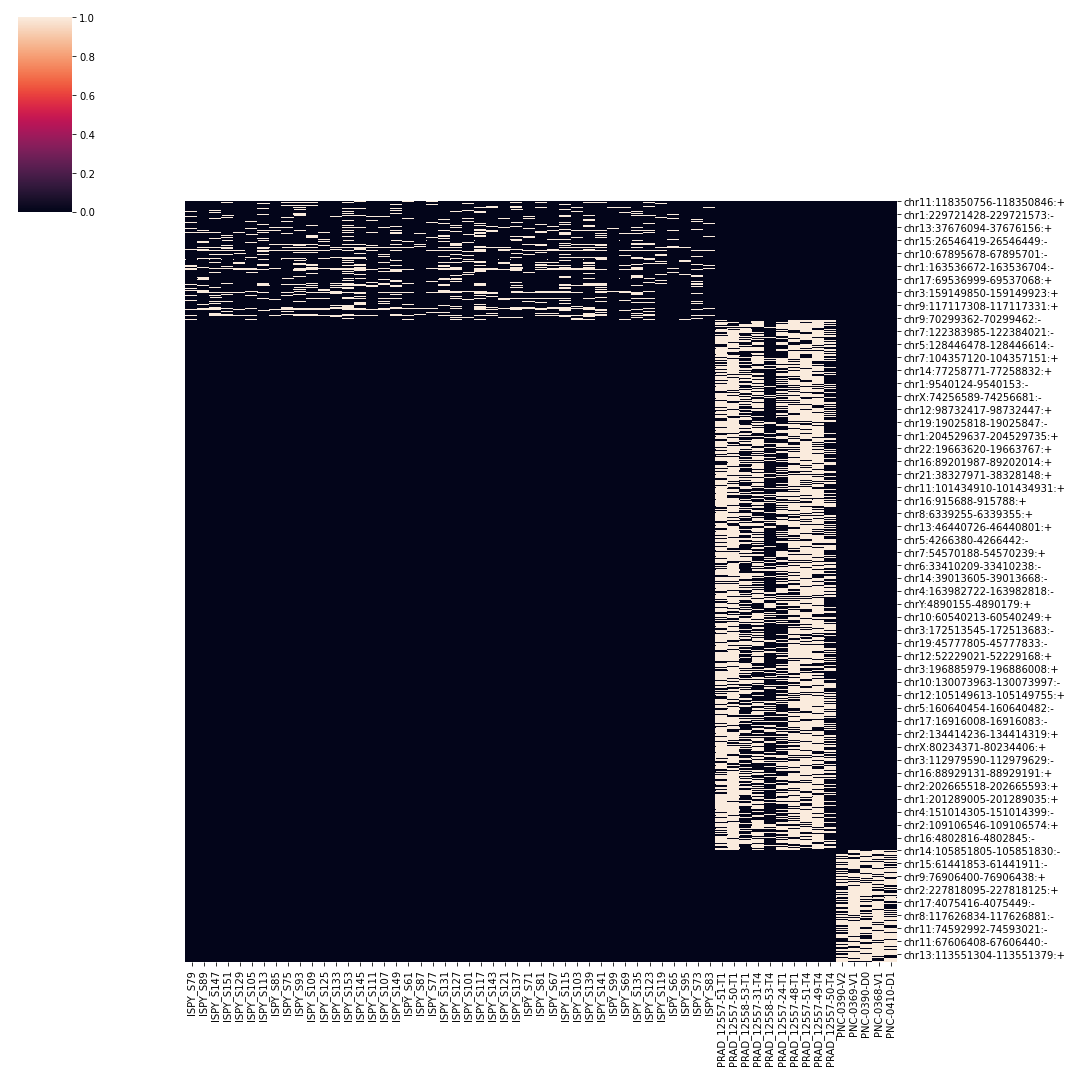

In [14]:
sns_plot = sns.clustermap(merged_bin_df, col_cluster=False, row_cluster=False, figsize=[15,15], rasterized=True)
sns_plot.savefig("figures/no_frac_oncRNAs_serum.pdf")

# Frac Version
Here are the results from using a fraction limit of 0.3

In [66]:
with open(f'data/counts/frac_sample_loci.json', 'r') as f:
    frac_sample_loci = js.load(f)
    f.close()

In [67]:
ISPY_meta = pd.read_excel("metadata/ISPY_all_clinical_data_combined.xlsx")
to_drop = ISPY_meta[(ISPY_meta["PrePost(0:Pre,3:Post)"] == 3) | (ISPY_meta["Admin.PCR"].isna())]["Working ID"]
to_drop.shape

(82,)

In [68]:
for k in to_drop:
    k = f"ISPY_{k}"
    if k in frac_sample_loci: #S90 and all the healthy from ISPY is already missing.
        frac_sample_loci.pop(k)
len(frac_sample_loci)

151

In [69]:
merged_df = pd.DataFrame(frac_sample_loci).fillna(0)
merged_df

,PRAD_12557-42-T1,PRAD_12557-24-T4,PRAD_12558-53-T1,PRAD_12557-36-T4,PRAD_12557-48-T4,PRAD_12557-27-T1,PRAD_12557-60-T4,PRAD_12557-37-T4,PRAD_12557-63-T4,PRAD_12557-17-T4,...,ISPY_S19,ISPY_S23,ISPY_S35,ISPY_S91,ISPY_S61,ISPY_S87,ISPY_S77,ISPY_S139,ISPY_S103,ISPY_S115
chr1:2416595-2416680:-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:4654777-4654805:+,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:6370072-6370189:+,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:118852369-118852449:-,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:195678943-195678985:+,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:18902963-18903017:+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
chrX:96377119-96377169:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
chrX:137004605-137004762:+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
chrX:152764742-152764784:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
prad = merged_df.loc[:, merged_df.columns.str.contains("PRAD")]
prad = prad.loc[:, prad.sum(axis=0)>10000]
prad = prad.loc[prad.sum(axis=1)>0,:]
prad.shape

(148214, 10)

In [71]:
brca = merged_df.loc[:, merged_df.columns.str.contains("ISPY")]
brca = brca.loc[:,brca.sum(axis=0)>150]
brca = brca.loc[brca.sum(axis=1)>0,:]
brca.shape

(24101, 67)

In [72]:
pdac = merged_df.loc[:, merged_df.columns.str.contains("PNC")]
pdac = pdac.loc[:,pdac.sum(axis=0)>2000]
pdac = pdac.loc[pdac.sum(axis=1)>0,:]
pdac.shape

(70281, 5)

In [73]:
merged_df = pd.concat([brca.sample(frac=1), prad.sample(frac=1), pdac.sample(frac=1), ], axis=1).fillna(0)
merged_df.shape

(168084, 82)

Adding the fraction definitely reduced the number of oncRNAs, which is quite expected,168084 compared to 172131 without ratio=0.3 requirement. Also had to change BRCA counts.

In [74]:
merged_bin_df = merged_df.copy()
merged_bin_df[merged_bin_df>0] = 1
merged_bin_df = merged_bin_df.loc[merged_bin_df.sum(axis=1)>2,]
merged_bin_df.shape

(70032, 82)

In [75]:
BRCA_columns = np.array([True if x.startswith("ISPY") else False for x in merged_bin_df.columns])
PRAD_columns = np.array([True if x.startswith("PRAD") else False for x in merged_bin_df.columns])
PAAD_columns = np.array([True if x.startswith("PNC") else False for x in merged_bin_df.columns])
BRCA_rows = merged_bin_df.loc[(merged_bin_df.loc[:,BRCA_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~BRCA_columns].sum(axis=1)==0),].index
PRAD_rows = merged_bin_df.loc[(merged_bin_df.loc[:,PRAD_columns].sum(axis=1)>4) & (merged_bin_df.iloc[:,~PRAD_columns].sum(axis=1)==0),].index
PAAD_rows = merged_bin_df.loc[(merged_bin_df.loc[:,PAAD_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~PAAD_columns].sum(axis=1)==0),].index

merged_bin_df = merged_bin_df.loc[((merged_bin_df.loc[:,BRCA_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~BRCA_columns].sum(axis=1)==0)) | \
                        ((merged_bin_df.loc[:,PRAD_columns].sum(axis=1)>4) & (merged_bin_df.iloc[:,~PRAD_columns].sum(axis=1)==0)) | \
                        ((merged_bin_df.loc[:,PAAD_columns].sum(axis=1)>1) & (merged_bin_df.iloc[:,~PAAD_columns].sum(axis=1)==0)),]

merged_bin_df.shape, BRCA_rows.shape, PRAD_rows.shape, PAAD_rows.shape

((4574, 82), (632,), (3251,), (691,))

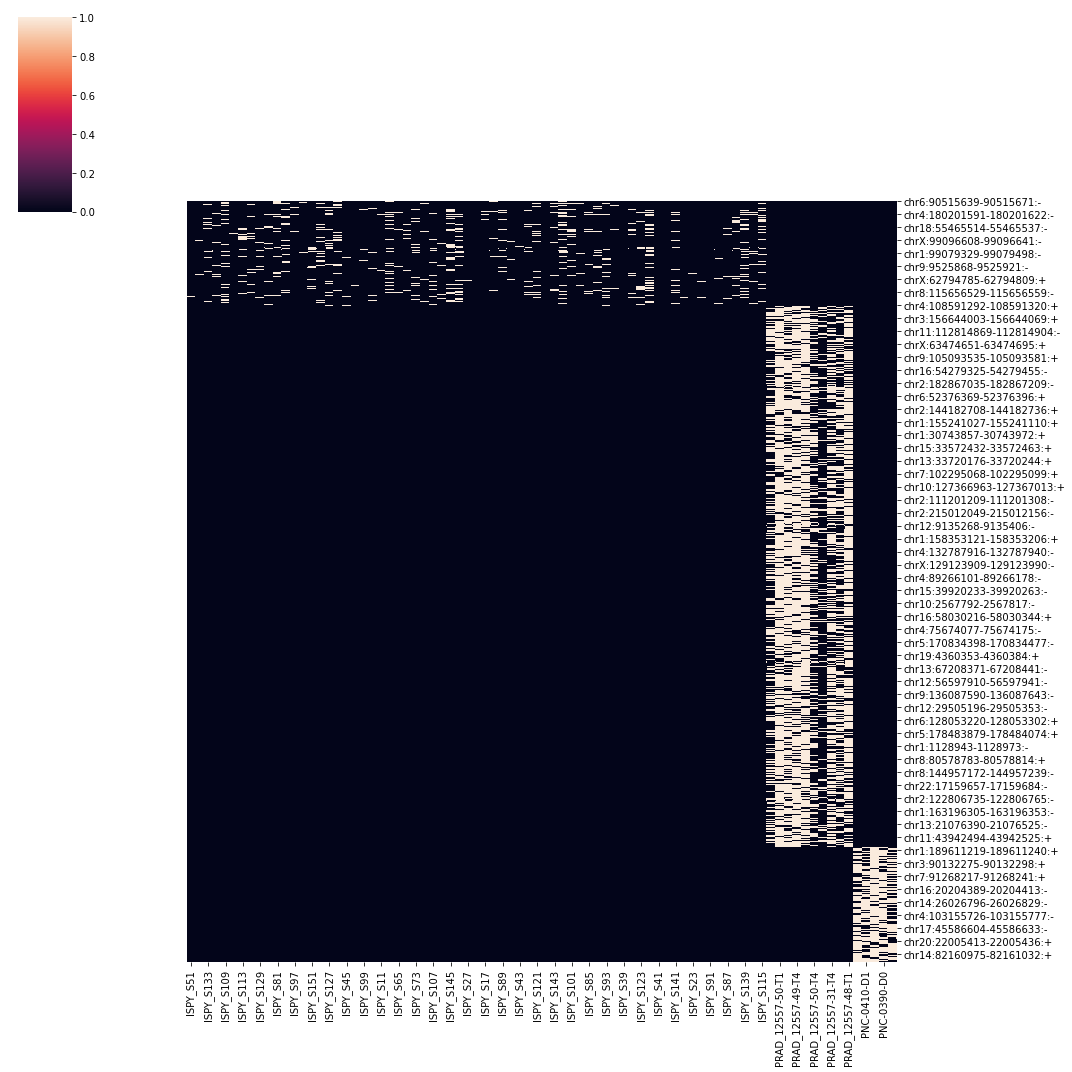

In [76]:
sns_plot = sns.clustermap(merged_bin_df, col_cluster=False, row_cluster=False, figsize=[15,15], rasterized=True)
sns_plot.savefig("figures/frac_oncRNAs_serum.pdf")

# Classifier

In [77]:
merged_bin_df_all = merged_df.copy()
merged_bin_df_all[merged_bin_df_all>0] = 1

In [78]:
from collections import defaultdict
confusion_dict = defaultdict(dict)
for t1 in ["BRCA", "PRAD", "PAAD"]:
    for t2 in ["BRCA", "PRAD", "PAAD"]:
        confusion_dict[t1][t2] = 0

In [79]:
for i,sample in enumerate(merged_bin_df_all.columns.tolist()[::-1]):
    target=""
    if sample.startswith("ISPY"):
        target = "BRCA"
    elif sample.startswith("PRAD"):
        target = "PRAD"
    elif sample.startswith("PNC"):
        target = "PAAD"

    tmp_df = merged_bin_df_all.drop([sample], axis=1)
    BRCA_columns = np.array([True if x.startswith("ISPY") else False for x in tmp_df.columns])
    PRAD_columns = np.array([True if x.startswith("PRAD") else False for x in tmp_df.columns])
    PAAD_columns = np.array([True if x.startswith("PNC") else False for x in tmp_df.columns])
    BRCA_rows = tmp_df.loc[(tmp_df.loc[:,BRCA_columns].sum(axis=1)>1) & (tmp_df.iloc[:,~BRCA_columns].sum(axis=1)==0),].index
    PRAD_rows = tmp_df.loc[(tmp_df.loc[:,PRAD_columns].sum(axis=1)>4) & (tmp_df.iloc[:,~PRAD_columns].sum(axis=1)==0),].index
    PAAD_rows = tmp_df.loc[(tmp_df.loc[:,PAAD_columns].sum(axis=1)>1) & (tmp_df.iloc[:,~PAAD_columns].sum(axis=1)==0),].index
    
    tmp_df = tmp_df.loc[((tmp_df.loc[:,BRCA_columns].sum(axis=1)>1) & (tmp_df.iloc[:,~BRCA_columns].sum(axis=1)==0)) | \
                        ((tmp_df.loc[:,PRAD_columns].sum(axis=1)>4) & (tmp_df.iloc[:,~PRAD_columns].sum(axis=1)==0)) | \
                        ((tmp_df.loc[:,PAAD_columns].sum(axis=1)>1) & (tmp_df.iloc[:,~PAAD_columns].sum(axis=1)==0)),]
    
    
    test = merged_bin_df_all.loc[tmp_df.index,sample]
    BRCA_score = test[BRCA_rows].sum() / len(BRCA_rows)
    PRAD_score = test[PRAD_rows].sum() / len(PRAD_rows)
    PAAD_score = test[PAAD_rows].sum() / len(PAAD_rows)
    
    test_call=""
    if max(BRCA_score, PRAD_score, PAAD_score) == BRCA_score:
        test_call = "BRCA"
    elif max(BRCA_score, PRAD_score, PAAD_score) == PRAD_score:
        test_call = "PRAD"
    elif max(BRCA_score, PRAD_score, PAAD_score) == PAAD_score:
        test_call = "PAAD"
    
    if confusion_dict[target] and confusion_dict[target][test_call]:
        confusion_dict[target][test_call] += 1
    else:
        confusion_dict[target][test_call] = 1    

In [80]:
confusion_dict

defaultdict(dict,
            {'BRCA': {'BRCA': 67, 'PRAD': 0, 'PAAD': 0},
             'PRAD': {'BRCA': 0, 'PRAD': 10, 'PAAD': 0},
             'PAAD': {'BRCA': 0, 'PRAD': 0, 'PAAD': 5}})

In [81]:
confusion_df = pd.DataFrame.from_dict(confusion_dict)
confusion_df

,BRCA,PRAD,PAAD
BRCA,67,0,0
PRAD,0,10,0
PAAD,0,0,5


In [82]:
confusion_df / confusion_df.sum(axis=1)

,BRCA,PRAD,PAAD
BRCA,1.0,0.0,0.0
PRAD,0.0,1.0,0.0
PAAD,0.0,0.0,1.0


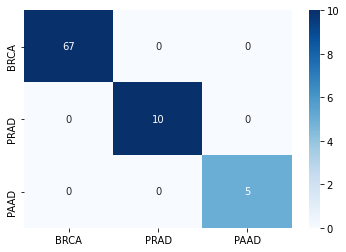

In [83]:
con_plot = sns.heatmap(confusion_df, annot=True, vmax=10, cmap="Blues")

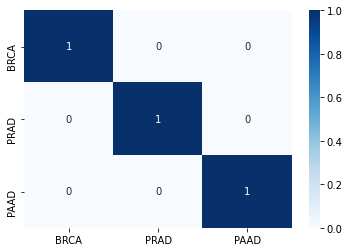

In [84]:
con_plot = sns.heatmap(confusion_df / confusion_df.sum(axis=1), annot=True, vmax=1, cmap="Blues")

# Done